# GEOTRACES data available near the project domain

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from cartopy import crs, feature
import numpy as np
import cmocean as cm

In [2]:
grid = xr.open_dataset("grid.nc")
data = xr.open_dataset("./data_from_GEOTRACES_IDP2021_Seawater_Discrete_Sample_Data_v1.nc")

In [3]:
#stations with temperature and salinity data: 
for i in range(26):
    if np.max(data.CTDTMP_T_VALUE_SENSOR[i,:]).values > 0 :
        if np.max(data.SALINITY_D_CONC_BOTTLE[i,:]).values > 0 :
            print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13


/home/rbeutel/anaconda3/envs/Ariane/lib/python3.9/site-packages/shapefile.py:391: UserWarning: Shapefile shape has invalid polygon: no exterior rings found (must have clockwise orientation); interpreting holes as exteriors.
  warnings.warn('Shapefile shape has invalid polygon: no exterior rings found (must have clockwise orientation); interpreting holes as exteriors.')


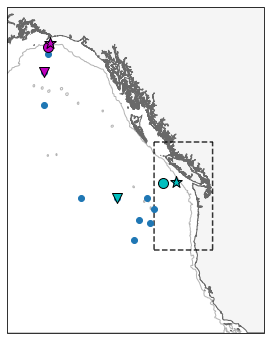

In [4]:
xlim, ylim = [-150, -115], [33, 62]
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'projection': crs.Mercator(np.mean(xlim), *ylim)})
ax.set_extent(xlim + ylim)

# Draw coastline
ax.add_feature(feature.GSHHSFeature('high', edgecolor='dimgray', facecolor='whitesmoke', zorder=2))
# Draw 1000 m isobar
ax.add_feature(feature.NaturalEarthFeature(name='bathymetry_J_1000', scale='10m', category='physical', edgecolor='dimgray', facecolor='white', alpha=0.5))

# Draw model box
ax.plot(grid['lon_rho'][ :,  0], grid['lat_rho'][ :,  0], 'k--', alpha=0.8, zorder=3, transform=crs.PlateCarree())
ax.plot(grid['lon_rho'][ :, -1], grid['lat_rho'][ :, -1], 'k--', alpha=0.8, zorder=3, transform=crs.PlateCarree())
ax.plot(grid['lon_rho'][ 0,  :], grid['lat_rho'][ 0,  :], 'k--', alpha=0.8, zorder=3, transform=crs.PlateCarree())
ax.plot(grid['lon_rho'][-1,  :], grid['lat_rho'][-1,  :], 'k--', alpha=0.8, zorder=3, transform=crs.PlateCarree())

# Draw locations of GEOTRACES measurements
# paint=['r','y','b','c','teal','g','orange','k','pink','purple','brown','m','limegreen','navy']
ax.scatter(data.longitude[:13+1],data.latitude[:13+1], transform=crs.PlateCarree(), zorder=4)
#stations that i want to look into further: 5 (green), 6 (orange), 7 (black), 12 (limegreen)
#also adding station second closest to shore: 8 (pink), 4 (teal) 
ax.scatter(data.longitude[5], data.latitude[5], marker='*', s=150, color='c', edgecolors='k', transform=crs.PlateCarree(), zorder=6) #near JdF, shelf - station BD22
ax.scatter(data.longitude[6], data.latitude[6], marker='v', s=100, color='m', edgecolors='k', transform=crs.PlateCarree(), zorder=5) #north, offshore - station 11
ax.scatter(data.longitude[7], data.latitude[7], marker='*', s=150, color='m', edgecolors='k', transform=crs.PlateCarree(), zorder=6) #north, shelf - station 12
ax.scatter(data.longitude[12], data.latitude[12], marker='v', s=100, color='c', edgecolors='k', transform=crs.PlateCarree(), zorder=5) #near JdF, offshore - station 20
ax.scatter(data.longitude[4], data.latitude[4], marker='o', s=100, color='c', edgecolors='k', transform=crs.PlateCarree(), zorder=5) #near JdF, second closest to shore- station BD21
ax.scatter(data.longitude[8], data.latitude[8], marker='o', s=100, color='m', edgecolors='k', transform=crs.PlateCarree(), zorder=5) #north, second closest - station 13

plt.savefig("GEOTRACESmap.png")


In [5]:
# in all those stations we have nitrate and phosphate - i've heard the Maite is a fan of N*..

def nstar(nitrate, phosphate):
    N = (nitrate - 16*phosphate + 2.90)*0.87 # equation 13 from Gruber & Sarmiento, 1997
    return N

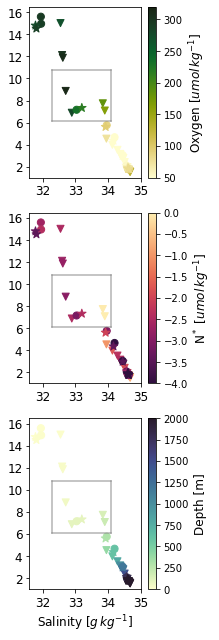

In [10]:
fig, ax = plt.subplots(3,1, figsize=(3,9))

# fig, ax = plt.subplots(1,3, figsize=(15,6))

#oxygen
salt = data.SALINITY_D_CONC_BOTTLE[12,:].values
temp = data.CTDTMP_T_VALUE_SENSOR[12,:].values
tracer = data.OXYGEN_D_CONC_BOTTLE[12,:].values
im = ax[0].scatter(salt, temp, c=tracer, s=50, cmap=cm.cm.speed, vmin=50, vmax=320, marker='v', label='station 20, offshore')
cb = fig.colorbar(im, ax=ax[0])
cb.set_label('Oxygen [$umol\,kg^{-1}$]', labelpad=5, fontsize=12)

salt = data.SALINITY_D_CONC_BOTTLE[4,:].values
temp = data.CTDTMP_T_VALUE_SENSOR[4,:].values
tracer = data.OXYGEN_D_CONC_BOTTLE[4,:].values
im = ax[0].scatter(salt, temp, c=tracer, s=50, cmap=cm.cm.speed, vmin=50, vmax=320, marker='o', label='station BD21, next')

salt = data.SALINITY_D_CONC_BOTTLE[5,:].values
temp = data.CTDTMP_T_VALUE_SENSOR[5,:].values
tracer = data.OXYGEN_D_CONC_BOTTLE[5,:].values
im = ax[0].scatter(salt, temp, c=tracer, s=80, cmap=cm.cm.speed, vmin=50, vmax=320, marker='*', label='station BD22, shelf')

# N*
salt = data.SALINITY_D_CONC_BOTTLE[12,:].values
temp = data.CTDTMP_T_VALUE_SENSOR[12,:].values
tracer = nstar(data.NO2_NO3_D_CONC_BOTTLE[12,:].values,data.PHOSPHATE_D_CONC_BOTTLE[12,:].values)
im = ax[1].scatter(salt, temp, c=tracer, s=50, cmap=cm.cm.matter_r, vmin=-4, vmax=0, marker='v', label='station 20, offshore')
cb = fig.colorbar(im, ax=ax[1])
cb.set_label('N$^*$ [$umol\,kg^{-1}$]', labelpad=5, fontsize=12)

salt = data.SALINITY_D_CONC_BOTTLE[4,:].values
temp = data.CTDTMP_T_VALUE_SENSOR[4,:].values
tracer = nstar(data.NO2_NO3_D_CONC_BOTTLE[4,:].values,data.PHOSPHATE_D_CONC_BOTTLE[4,:].values)
im = ax[1].scatter(salt, temp, c=tracer, s=50, cmap=cm.cm.matter_r, vmin=-4, vmax=0, marker='o', label='station BD21, next')

salt = data.SALINITY_D_CONC_BOTTLE[5,:].values
temp = data.CTDTMP_T_VALUE_SENSOR[5,:].values
tracer = nstar(data.NO2_NO3_D_CONC_BOTTLE[5,:].values,data.PHOSPHATE_D_CONC_BOTTLE[5,:].values)
im = ax[1].scatter(salt, temp, c=tracer, s=80, cmap=cm.cm.matter_r, vmin=-4, vmax=0, marker='*', label='station BD22, shelf')

#nitrate nitrite
# salt = data.SALINITY_D_CONC_BOTTLE[12,:].values
# temp = data.CTDTMP_T_VALUE_SENSOR[12,:].values
# tracer = data.NO2_NO3_D_CONC_BOTTLE[12,:].values
# im = ax[1].scatter(salt, temp, c=tracer, s=50, cmap=cm.cm.turbid, vmin=0, vmax=45, marker='v', label='station 20, offshore')
# cb = fig.colorbar(im, ax=ax[1])
# cb.set_label('Nitrate [$umol\,kg^{-1}$]', labelpad=5, fontsize=12)

# salt = data.SALINITY_D_CONC_BOTTLE[4,:].values
# temp = data.CTDTMP_T_VALUE_SENSOR[4,:].values
# tracer = data.NO2_NO3_D_CONC_BOTTLE[4,:].values
# im = ax[1].scatter(salt, temp, c=tracer, s=50, cmap=cm.cm.turbid, vmin=0, vmax=45, marker='o', label='station BD21, next')

# salt = data.SALINITY_D_CONC_BOTTLE[5,:].values
# temp = data.CTDTMP_T_VALUE_SENSOR[5,:].values
# tracer = data.NO2_NO3_D_CONC_BOTTLE[5,:].values
# im = ax[1].scatter(salt, temp, c=tracer, s=80, cmap=cm.cm.turbid, vmin=0, vmax=45, marker='*', label='station BD22, shelf')

#depth
salt = data.SALINITY_D_CONC_BOTTLE[12,:].values
temp = data.CTDTMP_T_VALUE_SENSOR[12,:].values
tracer = data.DEPTH[12,:].values
im = ax[2].scatter(salt, temp, c=tracer, s=50, cmap=cm.cm.deep, vmin=0, vmax=2000, marker='v', label='station 20, offshore')
cb = fig.colorbar(im, ax=ax[2])
cb.set_label('Depth [m]', labelpad=5, fontsize=12)

salt = data.SALINITY_D_CONC_BOTTLE[4,:].values
temp = data.CTDTMP_T_VALUE_SENSOR[4,:].values
tracer = data.DEPTH[4,:].values
im = ax[2].scatter(salt, temp, c=tracer, s=50, cmap=cm.cm.deep, vmin=0, vmax=2000, marker='o', label='station BD21, next')

salt = data.SALINITY_D_CONC_BOTTLE[5,:].values
temp = data.CTDTMP_T_VALUE_SENSOR[5,:].values
tracer = data.DEPTH[5,:].values
im = ax[2].scatter(salt, temp, c=tracer, s=80, cmap=cm.cm.deep, vmin=0, vmax=2000, marker='*', label='station BD22, shelf')

# #phosphate
# salt = data.SALINITY_D_CONC_BOTTLE[12,:].values
# temp = data.CTDTMP_T_VALUE_SENSOR[12,:].values
# tracer = data.PHOSPHATE_D_CONC_BOTTLE[12,:].values
# im = ax[2].scatter(salt, temp, c=tracer, s=50, cmap=cm.cm.matter, vmin=0, vmax=3.5, marker='v', label='station 20, offshore')
# cb = fig.colorbar(im, ax=ax[2])
# cb.set_label('Phosphate [$umol\,kg^{-1}$]', labelpad=5, fontsize=12)

# salt = data.SALINITY_D_CONC_BOTTLE[4,:].values
# temp = data.CTDTMP_T_VALUE_SENSOR[4,:].values
# tracer = data.PHOSPHATE_D_CONC_BOTTLE[4,:].values
# im = ax[2].scatter(salt, temp, c=tracer, s=50, cmap=cm.cm.matter, vmin=0, vmax=3.5, marker='o', label='station BD21, next')

# salt = data.SALINITY_D_CONC_BOTTLE[5,:].values
# temp = data.CTDTMP_T_VALUE_SENSOR[5,:].values
# tracer = data.PHOSPHATE_D_CONC_BOTTLE[5,:].values
# im = ax[2].scatter(salt, temp, c=tracer, s=80, cmap=cm.cm.matter, vmin=0, vmax=3.5, marker='*', label='station BD22, shelf')

for i in range(3):
    # ax[i].set_ylabel('Temperature [$^\circ C$]', fontsize=12)
    # ax[i].set_xlabel('Salinity [$g\,kg^{-1}$]', fontsize=12)
    ax[i].set_yticks(np.arange(2,17,2))
    ax[i].set_yticklabels(np.arange(2,17,2),fontsize=12)
    ax[i].set_xticks(np.arange(32,35.1,1))
    ax[i].set_xticklabels([32,33,34,35],fontsize=12)
    # ax[i].grid(color='gray',alpha=0.1)
    ax[i].set_ylim([1, 16.5])
    ax[i].set_xlim([31.6, 35])
    # ax[i].legend()

    # make a nice lil box around the "area of interest" ;  (salinity from 32.3-34.1 and temperature from 6.1-10.8
    ax[i].plot([32.3, 32.3], [6.1,10.8], color='gray', alpha=0.6)
    ax[i].plot([34.1, 34.1], [6.1,10.8], color='gray', alpha=0.6)
    ax[i].plot([34.1, 32.3], [6.1,6.1], color='gray', alpha=0.6)
    ax[i].plot([34.1, 32.3], [10.8,10.8], color='gray', alpha=0.6)


ax[2].set_xlabel('Salinity [$g\,kg^{-1}$]', fontsize=12)

plt.tight_layout()
plt.savefig("SouthGEOTRACES_TS.png")

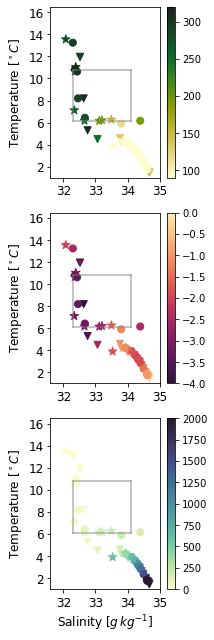

In [11]:
# fig, ax = plt.subplots(1,3, figsize=(15,6))
fig, ax = plt.subplots(3,1, figsize=(3,9))


#oxygen
salt = data.SALINITY_D_CONC_BOTTLE[6,:].values
temp = data.CTDTMP_T_VALUE_SENSOR[6,:].values
tracer = data.OXYGEN_D_CONC_BOTTLE[6,:].values
im = ax[0].scatter(salt, temp, c=tracer, s=50, cmap=cm.cm.speed, vmin=90, vmax=320, marker='v', label='station 11, offshore')
cb = fig.colorbar(im, ax=ax[0])
# cb.set_label('Oxygen [$umol\,kg^{-1}$]', labelpad=5, fontsize=12)

salt = data.SALINITY_D_CONC_BOTTLE[8,:].values
temp = data.CTDTMP_T_VALUE_SENSOR[8,:].values
tracer = data.OXYGEN_D_CONC_BOTTLE[8,:].values
im = ax[0].scatter(salt, temp, c=tracer, s=50, cmap=cm.cm.speed, vmin=90, vmax=320, marker='o', label='station 13, next')

salt = data.SALINITY_D_CONC_BOTTLE[7,:].values
temp = data.CTDTMP_T_VALUE_SENSOR[7,:].values
tracer = data.OXYGEN_D_CONC_BOTTLE[7,:].values
im = ax[0].scatter(salt, temp, c=tracer, s=80, cmap=cm.cm.speed, vmin=90, vmax=320, marker='*', label='station 12, shelf')

# #nitrate nitrite
# salt = data.SALINITY_D_CONC_BOTTLE[6,:].values
# temp = data.CTDTMP_T_VALUE_SENSOR[6,:].values
# tracer = data.NO2_NO3_D_CONC_BOTTLE[6,:].values
# im = ax[1].scatter(salt, temp, c=tracer, s=50, cmap=cm.cm.turbid, vmin=0, vmax=45, marker='v', label='station 11, offshore')
# cb = fig.colorbar(im, ax=ax[1])
# cb.set_label('Nitrate [$umol\,kg^{-1}$]', labelpad=10, fontsize=12)

# salt = data.SALINITY_D_CONC_BOTTLE[8,:].values
# temp = data.CTDTMP_T_VALUE_SENSOR[8,:].values
# tracer = data.NO2_NO3_D_CONC_BOTTLE[8,:].values
# im = ax[1].scatter(salt, temp, c=tracer, s=50, cmap=cm.cm.turbid, vmin=0, vmax=45, marker='o', label='station 13, next')

# salt = data.SALINITY_D_CONC_BOTTLE[7,:].values
# temp = data.CTDTMP_T_VALUE_SENSOR[7,:].values
# tracer = data.NO2_NO3_D_CONC_BOTTLE[7,:].values
# im = ax[1].scatter(salt, temp, c=tracer, s=80, cmap=cm.cm.turbid, vmin=0, vmax=45, marker='*', label='station 12, shelf')

# N*
salt = data.SALINITY_D_CONC_BOTTLE[6,:].values
temp = data.CTDTMP_T_VALUE_SENSOR[6,:].values
tracer = nstar(data.NO2_NO3_D_CONC_BOTTLE[6,:].values,data.PHOSPHATE_D_CONC_BOTTLE[6,:].values)
im = ax[1].scatter(salt, temp, c=tracer, s=50, cmap=cm.cm.matter_r, vmin=-4, vmax=0, marker='v', label='station 11, offshore')
cb = fig.colorbar(im, ax=ax[1])
# cb.set_label('N$^*$ [$umol\,kg^{-1}$]', labelpad=5, fontsize=12)

salt = data.SALINITY_D_CONC_BOTTLE[8,:].values
temp = data.CTDTMP_T_VALUE_SENSOR[8,:].values
tracer = nstar(data.NO2_NO3_D_CONC_BOTTLE[8,:].values,data.PHOSPHATE_D_CONC_BOTTLE[8,:].values)
im = ax[1].scatter(salt, temp, c=tracer, s=50, cmap=cm.cm.matter_r, vmin=-4, vmax=0, marker='o', label='station 13, next')

salt = data.SALINITY_D_CONC_BOTTLE[7,:].values
temp = data.CTDTMP_T_VALUE_SENSOR[7,:].values
tracer = nstar(data.NO2_NO3_D_CONC_BOTTLE[7,:].values,data.PHOSPHATE_D_CONC_BOTTLE[7,:].values)
im = ax[1].scatter(salt, temp, c=tracer, s=80, cmap=cm.cm.matter_r, vmin=-4, vmax=0, marker='*', label='station 12, shelf')

# #phosphate
# salt = data.SALINITY_D_CONC_BOTTLE[6,:].values
# temp = data.CTDTMP_T_VALUE_SENSOR[6,:].values
# tracer = data.PHOSPHATE_D_CONC_BOTTLE[6,:].values
# im = ax[2].scatter(salt, temp, c=tracer, s=50, cmap=cm.cm.matter, vmin=0, vmax=1, marker='v', label='station 11, offshore')
# cb = fig.colorbar(im, ax=ax[2])
# cb.set_label('Phosphate [$umol\,kg^{-1}$]', labelpad=10, fontsize=12)

# salt = data.SALINITY_D_CONC_BOTTLE[8,:].values
# temp = data.CTDTMP_T_VALUE_SENSOR[8,:].values
# tracer = data.PHOSPHATE_D_CONC_BOTTLE[8,:].values
# im = ax[2].scatter(salt, temp, c=tracer, s=50, cmap=cm.cm.matter, vmin=0, vmax=3, marker='o', label='station 13, next')

# salt = data.SALINITY_D_CONC_BOTTLE[7,:].values
# temp = data.CTDTMP_T_VALUE_SENSOR[7,:].values
# tracer = data.PHOSPHATE_D_CONC_BOTTLE[7,:].values
# im = ax[2].scatter(salt, temp, c=tracer, s=80, cmap=cm.cm.matter, vmin=0, vmax=3, marker='*', label='station 12, shelf')

#depth
salt = data.SALINITY_D_CONC_BOTTLE[6,:].values
temp = data.CTDTMP_T_VALUE_SENSOR[6,:].values
tracer = data.DEPTH[6,:].values
im = ax[2].scatter(salt, temp, c=tracer, s=50, cmap=cm.cm.deep, vmin=0, vmax=2000, marker='v', label='station 11, offshore')
cb = fig.colorbar(im, ax=ax[2])
# cb.set_label('Depth [m]', labelpad=5, fontsize=12)

salt = data.SALINITY_D_CONC_BOTTLE[8,:].values
temp = data.CTDTMP_T_VALUE_SENSOR[8,:].values
tracer = data.DEPTH[8,:].values
im = ax[2].scatter(salt, temp, c=tracer, s=50, cmap=cm.cm.deep, vmin=0, vmax=2000, marker='o', label='station 13, next')

salt = data.SALINITY_D_CONC_BOTTLE[7,:].values
temp = data.CTDTMP_T_VALUE_SENSOR[7,:].values
tracer = data.DEPTH[7,:].values
im = ax[2].scatter(salt, temp, c=tracer, s=80, cmap=cm.cm.deep, vmin=0, vmax=2000, marker='*', label='station 12, shelf')

for i in range(3):
    ax[i].set_ylabel('Temperature [$^\circ C$]', fontsize=12)
    # ax[i].set_xlabel('Salinity [$g\,kg^{-1}$]', fontsize=12)
    ax[i].set_yticks(np.arange(2,17,2))
    ax[i].set_yticklabels(np.arange(2,17,2),fontsize=12)
    ax[i].set_xticks(np.arange(32,35.1,1))
    ax[i].set_xticklabels([32,33,34,35],fontsize=12)
    # ax[i].grid(color='gray',alpha=0.1)
    ax[i].set_ylim([1, 16.5])
    ax[i].set_xlim([31.6, 35])
    # ax[i].legend()

    # make a nice lil box around the "area of interest" ;  (salinity from 32.3-34.1 and temperature from 6.1-10.8
    ax[i].plot([32.3, 32.3], [6.1,10.8], color='gray', alpha=0.6)
    ax[i].plot([34.1, 34.1], [6.1,10.8], color='gray', alpha=0.6)
    ax[i].plot([34.1, 32.3], [6.1,6.1], color='gray', alpha=0.6)
    ax[i].plot([34.1, 32.3], [10.8,10.8], color='gray', alpha=0.6)

ax[2].set_xlabel('Salinity [$g\,kg^{-1}$]', fontsize=12)

plt.tight_layout()
plt.savefig("NorthGEOTRACES_TS.png")


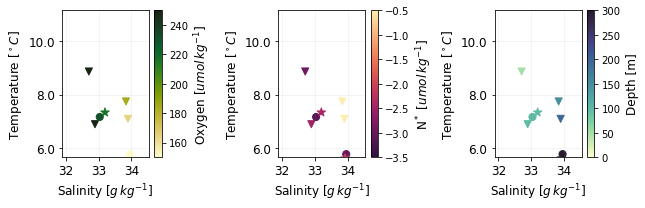

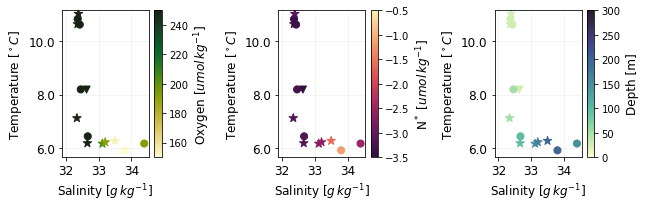

In [30]:
#what if we just looked at the specific salinity/temperature/density range found in my master's work
salmin, salmax = 32.8-0.52, 34.1+0.04# min and max based on one std deviation from the lowest and the highest (non Columbia or strait outflow) in CIOPS results
tpmin, tpmax = 6.5-0.45, 9.8+0.96

fig, ax = plt.subplots(1,3, figsize=(9,3))

#oxygen
salt = data.SALINITY_D_CONC_BOTTLE[12,:].values
temp = data.CTDTMP_T_VALUE_SENSOR[12,:].values
tracer = data.OXYGEN_D_CONC_BOTTLE[12,:].values
im = ax[0].scatter(salt, temp, c=tracer, s=50, cmap=cm.cm.speed, vmin=150, vmax=250, marker='v', label='station 20, offshore')
cb = fig.colorbar(im, ax=ax[0])
cb.set_label('Oxygen [$umol\,kg^{-1}$]', labelpad=5, fontsize=12)

salt = data.SALINITY_D_CONC_BOTTLE[4,:].values
temp = data.CTDTMP_T_VALUE_SENSOR[4,:].values
tracer = data.OXYGEN_D_CONC_BOTTLE[4,:].values
im = ax[0].scatter(salt, temp, c=tracer, s=50, cmap=cm.cm.speed, vmin=150, vmax=250, marker='o', label='station BD21, next')

salt = data.SALINITY_D_CONC_BOTTLE[5,:].values
temp = data.CTDTMP_T_VALUE_SENSOR[5,:].values
tracer = data.OXYGEN_D_CONC_BOTTLE[5,:].values
im = ax[0].scatter(salt, temp, c=tracer, s=80, cmap=cm.cm.speed, vmin=150, vmax=250, marker='*', label='station BD22, shelf')

# N*
salt = data.SALINITY_D_CONC_BOTTLE[12,:].values
temp = data.CTDTMP_T_VALUE_SENSOR[12,:].values
tracer = nstar(data.NO2_NO3_D_CONC_BOTTLE[12,:].values,data.PHOSPHATE_D_CONC_BOTTLE[12,:].values)
im = ax[1].scatter(salt, temp, c=tracer, s=50, cmap=cm.cm.matter_r, vmin=-3.5, vmax=-0.5, marker='v', label='station 20, offshore')
cb = fig.colorbar(im, ax=ax[1])
cb.set_label('N$^*$ [$umol\,kg^{-1}$]', labelpad=5, fontsize=12)

salt = data.SALINITY_D_CONC_BOTTLE[4,:].values
temp = data.CTDTMP_T_VALUE_SENSOR[4,:].values
tracer = nstar(data.NO2_NO3_D_CONC_BOTTLE[4,:].values,data.PHOSPHATE_D_CONC_BOTTLE[4,:].values)
im = ax[1].scatter(salt, temp, c=tracer, s=50, cmap=cm.cm.matter_r, vmin=-3.5, vmax=-0.5, marker='o', label='station BD21, next')

salt = data.SALINITY_D_CONC_BOTTLE[5,:].values
temp = data.CTDTMP_T_VALUE_SENSOR[5,:].values
tracer = nstar(data.NO2_NO3_D_CONC_BOTTLE[5,:].values,data.PHOSPHATE_D_CONC_BOTTLE[5,:].values)
im = ax[1].scatter(salt, temp, c=tracer, s=80, cmap=cm.cm.matter_r, vmin=-3.5, vmax=-0.5, marker='*', label='station BD22, shelf')

#depth
salt = data.SALINITY_D_CONC_BOTTLE[12,:].values
temp = data.CTDTMP_T_VALUE_SENSOR[12,:].values
tracer = data.DEPTH[12,:].values
im = ax[2].scatter(salt, temp, c=tracer, s=50, cmap=cm.cm.deep, vmin=0, vmax=300, marker='v', label='station 20, offshore')
cb = fig.colorbar(im, ax=ax[2])
cb.set_label('Depth [m]', labelpad=5, fontsize=12)

salt = data.SALINITY_D_CONC_BOTTLE[4,:].values
temp = data.CTDTMP_T_VALUE_SENSOR[4,:].values
tracer = data.DEPTH[4,:].values
im = ax[2].scatter(salt, temp, c=tracer, s=50, cmap=cm.cm.deep, vmin=0, vmax=300, marker='o', label='station BD21, next')

salt = data.SALINITY_D_CONC_BOTTLE[5,:].values
temp = data.CTDTMP_T_VALUE_SENSOR[5,:].values
tracer = data.DEPTH[5,:].values
im = ax[2].scatter(salt, temp, c=tracer, s=80, cmap=cm.cm.deep, vmin=0, vmax=300, marker='*', label='station BD22, shelf')

for i in range(3):
    ax[i].set_ylabel('Temperature [$^\circ C$]', fontsize=12)
    ax[i].set_xlabel('Salinity [$g\,kg^{-1}$]', fontsize=12)
    ax[i].set_yticks(np.arange(int(tpmin), tpmax+1,2))
    ax[i].set_yticklabels(np.arange(int(tpmin), tpmax+1,2),fontsize=12)
    ax[i].set_xticks([32,33,34])
    ax[i].set_xticklabels([32,33,34],fontsize=12)
    ax[i].grid(color='gray',alpha=0.1)
    ax[i].set_ylim([tpmin-0.4, tpmax+0.4])
    ax[i].set_xlim([salmin-0.4, salmax+0.4])
    # ax[i].legend()

plt.tight_layout()

fig, ax = plt.subplots(1,3, figsize=(9,3))

#oxygen
salt = data.SALINITY_D_CONC_BOTTLE[6,:].values
temp = data.CTDTMP_T_VALUE_SENSOR[6,:].values
tracer = data.OXYGEN_D_CONC_BOTTLE[6,:].values
im = ax[0].scatter(salt, temp, c=tracer, s=50, cmap=cm.cm.speed, vmin=150, vmax=250, marker='v', label='station 11, offshore')
cb = fig.colorbar(im, ax=ax[0])
cb.set_label('Oxygen [$umol\,kg^{-1}$]', labelpad=5, fontsize=12)

salt = data.SALINITY_D_CONC_BOTTLE[8,:].values
temp = data.CTDTMP_T_VALUE_SENSOR[8,:].values
tracer = data.OXYGEN_D_CONC_BOTTLE[8,:].values
im = ax[0].scatter(salt, temp, c=tracer, s=50, cmap=cm.cm.speed, vmin=150, vmax=250, marker='o', label='station 13, next')

salt = data.SALINITY_D_CONC_BOTTLE[7,:].values
temp = data.CTDTMP_T_VALUE_SENSOR[7,:].values
tracer = data.OXYGEN_D_CONC_BOTTLE[7,:].values
im = ax[0].scatter(salt, temp, c=tracer, s=80, cmap=cm.cm.speed, vmin=150, vmax=250, marker='*', label='station 12, shelf')

# N*
salt = data.SALINITY_D_CONC_BOTTLE[6,:].values
temp = data.CTDTMP_T_VALUE_SENSOR[6,:].values
tracer = nstar(data.NO2_NO3_D_CONC_BOTTLE[6,:].values,data.PHOSPHATE_D_CONC_BOTTLE[6,:].values)
im = ax[1].scatter(salt, temp, c=tracer, s=50, cmap=cm.cm.matter_r, vmin=-3.5, vmax=-0.5, marker='v', label='station 11, offshore')
cb = fig.colorbar(im, ax=ax[1])
cb.set_label('N$^*$ [$umol\,kg^{-1}$]', labelpad=5, fontsize=12)

salt = data.SALINITY_D_CONC_BOTTLE[8,:].values
temp = data.CTDTMP_T_VALUE_SENSOR[8,:].values
tracer = nstar(data.NO2_NO3_D_CONC_BOTTLE[8,:].values,data.PHOSPHATE_D_CONC_BOTTLE[8,:].values)
im = ax[1].scatter(salt, temp, c=tracer, s=50, cmap=cm.cm.matter_r, vmin=-3.5, vmax=-0.5, marker='o', label='station 13, next')

salt = data.SALINITY_D_CONC_BOTTLE[7,:].values
temp = data.CTDTMP_T_VALUE_SENSOR[7,:].values
tracer = nstar(data.NO2_NO3_D_CONC_BOTTLE[7,:].values,data.PHOSPHATE_D_CONC_BOTTLE[7,:].values)
im = ax[1].scatter(salt, temp, c=tracer, s=80, cmap=cm.cm.matter_r, vmin=-3.5, vmax=-0.5, marker='*', label='station 12, shelf')

#depth
salt = data.SALINITY_D_CONC_BOTTLE[6,:].values
temp = data.CTDTMP_T_VALUE_SENSOR[6,:].values
tracer = data.DEPTH[6,:].values
im = ax[2].scatter(salt, temp, c=tracer, s=50, cmap=cm.cm.deep, vmin=0, vmax=300, marker='v', label='station 11, offshore')
cb = fig.colorbar(im, ax=ax[2])
cb.set_label('Depth [m]', labelpad=5, fontsize=12)

salt = data.SALINITY_D_CONC_BOTTLE[8,:].values
temp = data.CTDTMP_T_VALUE_SENSOR[8,:].values
tracer = data.DEPTH[8,:].values
im = ax[2].scatter(salt, temp, c=tracer, s=50, cmap=cm.cm.deep, vmin=0, vmax=300, marker='o', label='station 13, next')

salt = data.SALINITY_D_CONC_BOTTLE[7,:].values
temp = data.CTDTMP_T_VALUE_SENSOR[7,:].values
tracer = data.DEPTH[7,:].values
im = ax[2].scatter(salt, temp, c=tracer, s=80, cmap=cm.cm.deep, vmin=0, vmax=300, marker='*', label='station 12, shelf')

for i in range(3):
    ax[i].set_ylabel('Temperature [$^\circ C$]', fontsize=12)
    ax[i].set_xlabel('Salinity [$g\,kg^{-1}$]', fontsize=12)
    ax[i].set_yticks(np.arange(int(tpmin), tpmax+1,2))
    ax[i].set_yticklabels(np.arange(int(tpmin), tpmax+1,2),fontsize=12)
    ax[i].set_xticks([32,33,34])
    ax[i].set_xticklabels([32,33,34],fontsize=12)
    ax[i].grid(color='gray',alpha=0.1)
    ax[i].set_ylim([tpmin-0.4, tpmax+0.4])
    ax[i].set_xlim([salmin-0.4, salmax+0.4])

plt.tight_layout()

## nice to check which stations have which data

In [8]:
vars = np.array([i for i in data.data_vars][15:]) #get list of measurement names
vars = np.delete(vars, np.arange(1,49,2)) #remove all the "qc" variables
vars = np.delete(vars, [2,3,4,5,6,7]) #and a couple more bottle number ones


In [9]:
# data_avail = np.zeros((len(data.longitude[:13+1]),len(vars)))
data_avail = list(np.zeros(len(data.longitude[:13+1])))
m = np.array([])

for i in range(len(data_avail)):
    for j in range(len(vars)):
        if str(np.max(data[vars[j]][i]).values)[0].isnumeric(): #!= np.nan:
            m = np.append(m,vars[j])
    data_avail[i] = m
    m=np.array([])

In [10]:
print('plotted stations that do not contain all measurements')
k=0
for i in range(len(data_avail)):
    if len(data_avail[i]) < len(vars):
        print(data.station_id[i].values)
        k+=1
if k==len(data_avail):
    print("\n")
    print("plot twist: its all of them")

plotted stations that do not contain all measurements
b'BD17'
b'BD18'
b'BD19'
b'BD20'
b'BD21'
b'BD22'
b'(11)'
b'(12)'
b'(13)'
b'(14)'
b'(15)'
b'(19)'
b'(20)'
b'(21)'


plot twist: its all of them


In [11]:
[len(data_avail[i]) for i in range(len(data_avail))]

[17, 17, 17, 11, 17, 11, 12, 12, 11, 12, 12, 12, 12, 12]

In [12]:
# what could lead to the inconsystency in measurements?
# all apparently from same cruise == GP02
# first sixe from late september 2012, last 8 from late july 2017
data.date_time[:14]

<xarray.DataArray 'date_time' (N_STATIONS: 14)>
array(['2012-09-28T00:03:14.000003860', '2012-09-29T02:21:58.999980392',
       '2012-09-29T18:10:30.000032856', '2012-09-30T07:38:00.000001564',
       '2012-09-30T22:52:00.000001788', '2012-10-01T07:49:59.000014364',
       '2017-07-20T03:02:00.000002912', '2017-07-21T12:20:59.999995296',
       '2017-07-22T06:59:00.000000224', '2017-07-22T14:23:29.000005216',
       '2017-07-24T08:06:29.999980096', '2017-07-30T21:27:45.000011392',
       '2017-08-01T10:38:29.000005216', '2017-08-02T21:54:29.999966016'],
      dtype='datetime64[ns]')
Dimensions without coordinates: N_STATIONS
Attributes:
    long_name:       Decimal Gregorian Days of the station
    standard_name:   time
    comment:         Relative Gregorian Days with decimal part
    C_format:        %.5f
    FORTRAN_format:  F12.5

In [33]:
data_avail[1]

array(['CTDPRS_T_VALUE_SENSOR', 'DEPTH', 'BODC_Event_Number',
       'CTDTMP_T_VALUE_SENSOR', 'CTDSAL_D_CONC_SENSOR',
       'SALINITY_D_CONC_BOTTLE', 'OXYGEN_D_CONC_BOTTLE',
       'PHOSPHATE_D_CONC_BOTTLE', 'SILICATE_D_CONC_BOTTLE',
       'NO2_NO3_D_CONC_BOTTLE', 'Cd_D_CONC_BOTTLE', 'Cu_D_CONC_BOTTLE',
       'Fe_D_CONC_BOTTLE', 'Mn_D_CONC_BOTTLE', 'Ni_D_CONC_BOTTLE',
       'Pb_D_CONC_BOTTLE', 'Zn_D_CONC_BOTTLE'], dtype='<U32')